# Tokenizer From Scratch

## Basic White Space Tokenization Approch For a Short Story

In [ ]:
# Read the txt file
with open("/content/the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

# Print the total number of characters
print("Total number of character:", len(raw_text))
# Print the first 100 characters
print(raw_text[:99])

Total number of character: 20758
I had always thought Jack Gisburn rather a cheap genius--though a

good fellow enough--so it was no


> Our goal is to tokenize this 20,479-character short story into individual words and special
characters that we can then turn into embeddings for LLM training  

We can use regular expression to split the text as **White space tokenization**

In [ ]:
# Example
import re

text = "Hello, world. This, is a test."
result = re.split(r'(\s)', text)

print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


> The result is a list of individual words, whitespaces, and punctuation characters. So need to modify the regular expression splits on whitespaces (\s) and commas, and periods


In [ ]:
result = re.split(r'([,.]|\s)', text)
print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


> We can see that the words and punctuation characters are now separate list entries just as
we wanted. A small remaining issue is that the list still includes whitespace characters. Optionally, we
can remove these redundant characters safely as follows

In [ ]:
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']


### Removing Whitespaces or Not



When developing a simple tokenizer, whether we should encode whitespaces as
separate characters or just remove them depends on our application and its
requirements.
- Removing whitespaces reduces the memory and computing
requirements.
- However, keeping whitespaces can be useful if we train models that
are sensitive to the exact structure of the text (for example, Python code, which is
sensitive to indentation and spacing).

Here, we remove whitespaces for simplicity
and brevity of the tokenized outputs. Later, we will switch to a tokenization scheme
that includes whitespaces.

### Update to Extract Other special Characters

###

> The tokenization scheme we devised above works well on the simple sample text. Let's
modify it a bit further so that it can also handle other types of punctuation, such as
question marks, quotation marks, and the double-dashes we have seen earlier in the first
100 characters of Edith Wharton's short story, along with additional special characters

In [ ]:
text = "Hello, world. Is this-- a test?"
result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [ ]:
# Strip whitespace from each item and then filter out any empty strings.
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [ ]:
text = "Hello, world. Is this-- a test?"

result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


### Apply for the Complete Set

Now that we got a basic tokenizer working, let's apply it to Edith Wharton's entire short
story

In [ ]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(preprocessed[:30])

['I', 'had', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


In [ ]:
print(len(preprocessed))

4663


## Creating Token IDs

In the previous section, we tokenized Edith Wharton's short story and assigned it to a
Python variable called preprocessed. Let's now create a list of all unique tokens and sort
them alphabetically to determine the vocabulary size

In [ ]:
# Get the unique IDs
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)
print(vocab_size)

1145


After determining that the vocabulary size is 1,145 via the above code, we create the
vocabulary and print its first 51 entries for illustration purposes

In [ ]:
vocab = {token:integer for integer,token in enumerate(all_words)}

In [ ]:
for i, item in enumerate(vocab.items()):
    print(item)
    if i >= 50:
        break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('AM', 12)
('Ah', 13)
('Among', 14)
('And', 15)
('Are', 16)
('Arrt', 17)
('As', 18)
('At', 19)
('Be', 20)
('Begin', 21)
('Burlington', 22)
('But', 23)
('By', 24)
('Carlo', 25)
('Chicago', 26)
('Claude', 27)
('Come', 28)
('Croft', 29)
('Destroyed', 30)
('Devonshire', 31)
('Don', 32)
('Dubarry', 33)
('Emperors', 34)
('End', 35)
('FELT', 36)
('Florence', 37)
('For', 38)
('Gallery', 39)
('Gideon', 40)
('Gisburn', 41)
('Gisburns', 42)
('Grafton', 43)
('Greek', 44)
('Grindle', 45)
('Grindles', 46)
('HAD', 47)
('HAS', 48)
('HAVE', 49)
('Had', 50)


As we can see, based on the output above, the dictionary contains individual tokens
associated with unique integer labels.

> When we want to convert the outputs of an LLM from numbers back into
text, we also need a way to turn token IDs into text.

> For this, we can create an **inverse
version** of the vocabulary that maps token IDs back to corresponding text tokens.

## Implement a complete tokenizer class



The class will have an encode method that splits
text into tokens and carries out the string-to-integer mapping to produce token IDs via the
vocabulary.

In addition, we implement a decode method that carries out the reverse
integer-to-string mapping to convert the token IDs back into text.

**Step 1:** Store the vocabulary as a class attribute for access in the encode and decode methods
    
**Step 2:** Create an inverse vocabulary that maps token IDs back to the original text tokens

**Step 3:** Process input text into token IDs

**Step 4**: Convert token IDs back into text

**Step 5:** Replace spaces before the specified punctuation


In [ ]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)

        preprocessed = [
            item.strip() for item in preprocessed if item.strip()
        ]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

Let's instantiate a new tokenizer object from the SimpleTokenizerV1 class and tokenize a
passage from Edith Wharton's short story to try it out in practice

In [ ]:
tokenizer = SimpleTokenizerV1(vocab)

text = """"It's the last he painted, you know,"
           Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

[1, 61, 2, 865, 1003, 616, 547, 761, 5, 1141, 611, 5, 1, 74, 7, 41, 866, 1123, 769, 809, 7]


In [ ]:
tokenizer.decode(ids)

'" It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

> Let's now apply it to a new text sample that is not contained in the training set

In [ ]:
text = "Hello, do you like tea?"
print(tokenizer.encode(text))

KeyError: 'Hello'

The problem is that the word "Hello" was not used in the The Verdict short story.

Hence, it is not contained in the vocabulary.

> This highlights the need to consider large and diverse
training sets to extend the vocabulary when working on LLMs.

## ADDING SPECIAL CONTEXT TOKENS

Modify the simplem tokenizer to handle unknown words.


Modify the vocabulary and tokenizer we implemented in the previous sections, SimpleTokenizerV2, to support two new tokens, **<|unk|>** and
**<|endoftext|>**

In [ ]:
# Add the tokens to the vocabulary
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
vocab = {token:integer for integer,token in enumerate(all_tokens)}

In [ ]:
len(vocab.items())

1147

In [ ]:
# Print last 5 elements
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

('younger', 1142)
('your', 1143)
('yourself', 1144)
('<|endoftext|>', 1145)
('<|unk|>', 1146)


Now what we need to do is,

> **Step 1:** Replace unknown words by <|unk|> tokens

> **Step 2:** Replace spaces before the specified punctuations

In [ ]:
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = { i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [
            item if item in self.str_to_int
            else "<|unk|>" for item in preprocessed
        ]

        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.:;?!"()\'])', r'\1', text)
        return text

In [ ]:
tokenizer = SimpleTokenizerV2(vocab)

text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."

text = " <|endoftext|> ".join((text1, text2))

print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [ ]:
tokenizer.encode(text)

[1146,
 5,
 369,
 1141,
 642,
 990,
 10,
 1145,
 60,
 1003,
 971,
 999,
 737,
 1003,
 1146,
 7]

In [ ]:
tokenizer.decode(tokenizer.encode(text))

'<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.'

### General Special Tokens

* **`<PAD>`** → Padding token (used to make all sequences equal length).
* **`<UNK>`** → Unknown token (for words not in the vocabulary).
* **`<BOS>`** or **`<s>`** → Beginning of sequence.
* **`<EOS>`** or **`</s>`** → End of sequence.
* **`<SEP>`** → Separator token (BERT uses this between sentences).
* **`<CLS>`** → Classification token (used as a representation for classification tasks, e.g., BERT).
* **`<MASK>`** → Mask token (used for masked language modeling).

### Model-Specific Tokens

* **BERT**

  * `[PAD]`, `[UNK]`, `[CLS]`, `[SEP]`, `[MASK]`
* **GPT family (GPT-2, GPT-3, GPT-4, GPT-5)**

  * \`\` (end of text / stop token)
  * `<|pad|>` (in some GPT variants for padding)
  * `<|bos|>` / `<|startoftext|>` (optional beginning marker, not always used)
* **T5**

  * `<pad>`, `</s>` (end of text), `<extra_id_N>` (special mask tokens for span corruption)
* **BART**

  * `<s>`, `</s>`, `<pad>`, `<mask>`
* **LLama / LLaMA2 / LLaMA3**

  * `<s>`, `</s>`, `<unk>`, `<pad>` (sometimes unused), `<mask>` (if fine-tuned for MLM)

### Special Control Tokens (Chat / Instruction Models)

* `<|system|>` → Marks system prompts.
* `<|user|>` → Marks user input.
* `<|assistant|>` → Marks assistant output.
* `<|endofturn|>` → Marks the end of a conversational turn.


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
print(tokenizer.special_tokens_map)
print(tokenizer.all_special_tokens)
print(tokenizer.all_special_ids)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}
['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]']
[100, 102, 0, 101, 103]


---

## BYTE PAIR ENCODING

> The tokenizer used for GPT models also doesn't use an <|unk|> token for outof-vocabulary words. Instead, GPT models use a byte pair encoding tokenizer, which breaks
down words into subword units

### Byte Pair Encoding (BPE) Algorithm


#### What is Byte Pair Encoding (BPE)?





**Byte Pair Encoding (BPE)** is a **subword tokenization algorithm** commonly used in modern NLP models (like GPT, BERT, LLaMA).

Instead of splitting text into words or single characters, BPE builds a vocabulary of the most frequent **character pairs** (byte pairs) and merges them repeatedly until a desired vocabulary size is reached.

#### Why BPE?



* Handles **out-of-vocabulary words** (unknown words are broken into smaller subwords/characters).
* Efficient: frequent words/subwords become single tokens, rare words are split.
* Works well with languages with complex morphology (e.g., German, Finnish).

### Examples

**Corpus:** `"low lowe lower"`

* Initial split: `["l", "o", "w", </w>]`, `["l","o","w","e",</w>]`, `["l","o","w","e","r",</w>]`

Iteration 1

* Most frequent pair: `"l"+"o"`
* Merge → `"lo"`
* Vocabulary now contains `"lo"`

Iteration 2

* Most frequent pair: `"lo"+"w"`
* Merge → `"low"`

Iteration 3

* Most frequent pair: `"e"+"r"`
* Merge → `"er"`

**Final Vocabulary:** `{ "l", "o", "w", "e", "r", "lo", "low", "er" }`

> That’s the core of BPE. Models like GPT-2 stop merging after \~50k merges → giving a 50k-token vocabulary.


### Pseudo Algorithm

```
INPUT:
  - corpus: a list of words (training data)
  - num_merges: how many merge operations to perform

OUTPUT:
  - BPE vocabulary (subword units)

-----------------------------------------------------

1. Initialize the vocabulary:
   For each word in the corpus:
       Represent it as a sequence of characters + an end-of-word symbol (e.g., "lower" → [l, o, w, e, r, </w>])

2. Count frequency of each word in the corpus.

3. LOOP for num_merges times:
     a. Count frequency of all symbol pairs across the corpus.
        (e.g., in "lower" → (l,o), (o,w), (w,e), (e,r), (r,</w>))

     b. Find the most frequent pair of symbols.

     c. Merge this pair into a new symbol (e.g., "l"+"o" → "lo").
        Update all word representations with this merged symbol.

     d. Add this new merged symbol to the vocabulary.

4. Return the final BPE vocabulary (characters + merged subwords).
```




### Use Tiktoken

In [ ]:
! pip3 install tiktoken

In [ ]:
import importlib
import tiktoken # OpenAI's tokenizer library (used in GPT models)

print("tiktoken version:", importlib.metadata.version("tiktoken"))

tiktoken version: 0.11.0


In [ ]:
# Load GPT-2 tokenizer
tokenizer = tiktoken.get_encoding("gpt2")

In [ ]:
# Input text with a special token <|endoftext|>
text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
     "of someunknownPlace."
)

# Encode text into integer token IDs
# "allowed_special" ensures the special token <|endoftext|> is preserved as one token
integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})

print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]


In [ ]:
# Decode back from integers to string
strings = tokenizer.decode(integers)

print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


In [ ]:
# Try encoding a random string (with unknown/rare patterns)
integers = tokenizer.encode("Akwirw ier")
print(integers)

strings = tokenizer.decode(integers)
print(strings)

[33901, 86, 343, 86, 220, 959]
Akwirw ier


## Data sampling with sliding window

In [ ]:
# Open and read the text file
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

# Encode the raw text into integer tokens using the tokenizer
# Each token is an integer ID from the tokenizer’s vocabulary
enc_text = tokenizer.encode(raw_text)

# Print the total number of tokens in the text
print(len(enc_text))

5765


In [ ]:
# Skip the first 50 tokens (to avoid printing very beginning of the book)
enc_sample = enc_text[50:]

In [ ]:
# Define the context size
#(how many tokens the model "looks at" before predicting the next one)
context_size = 4

# Create input (x) and target (y) sequences
# x: first 'context_size' tokens
# y: the same sequence, but shifted by 1 token to the right
x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]


print(f"x: {x}")
print(f"y:      {y}")

x: [30526, 257, 5527, 27075]
y:      [257, 5527, 27075, 11]


In [ ]:
# ----------------------------------------
# LOOP 1: Show how training pairs are formed
# ----------------------------------------
for i in range(1, context_size+1):
    # Context = tokens up to position i
    context = enc_sample[:i]

    # Desired = the "next token" the model should predict
    desired = enc_sample[i]

    # Print token IDs (numerical format)
    print(context, "---->", desired)

[30526] ----> 257
[30526, 257] ----> 5527
[30526, 257, 5527] ----> 27075
[30526, 257, 5527, 27075] ----> 11


In [ ]:
# ----------------------------------------
# LOOP 2: Show same thing, but decoded back into text
# ----------------------------------------
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    # Decode tokens into human-readable strings
    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

married ---->  a
married a ---->  rich
married a rich ---->  widow
married a rich widow ----> ,


## A note on Embeddings

### Embedding


Embeddings are real-valued dense vectors (multi-dimensional arrays) that carry the meaning of the words. They can capture the context of the word/sentence in a document, semantic similarity, relation with other words/sentences, etc. A popular example of how they extract the contexts from the words is if you remove a man from the king and add a woman, it will output a vector similar to a queen. Also, similar words are close to each other in the embedding space. Many pre-trained models are available such as Word2Vec, GloVe, Bert, etc.

### Pytorch Embedding

As defined in the official Pytorch Documentation, an Embedding layer is - "A simple lookup table that stores embeddings of a fixed dictionary and size." So basically at the low level, the Embedding layer is just a lookup table that maps an index value to a weight matrix of some dimension. This weight matrix is further optimised during training (updated during backpropagation to reduce the loss) to produce more useful vectors.This means the vectors are adjusted to better represent the semantics and relationships between words.

Embedding layer takes minimum of two arguments - num_embeddings and embedding_dim. There are various other optional parameters also such as padding_idx, max_norm, etc. Refer to the official docs for this. Now the first required parameter is num_embeddings which means what is the dictionary size. For example, if you have a vocabulary of 5000 words, then the value that will go into the first parameter will be 5000. The second required parameter is embedding_dim which means the size of each embedding vector(as all the learned vectors will have a fixed size).

### CBOW and Skip-gram Techniques

#### Continuous Bag of Words (CBOW)

Continuous Bag of Words (CBOW)- BOW predicts a target word based on the surrounding context words. This means that, for it to predict the focus word (the word we are interested in), it checks the surrounding words around it. The contextual representation of surrounding words for the focus word, helps in clearly predicting the word. It takes a pre-defined fixed window size into account and tries to predict the target word.

👉 **Goal**: Predict the **target word** from the **context words**. <br>
👉 Think of it as: *“Given the neighbors, guess the missing word.”*

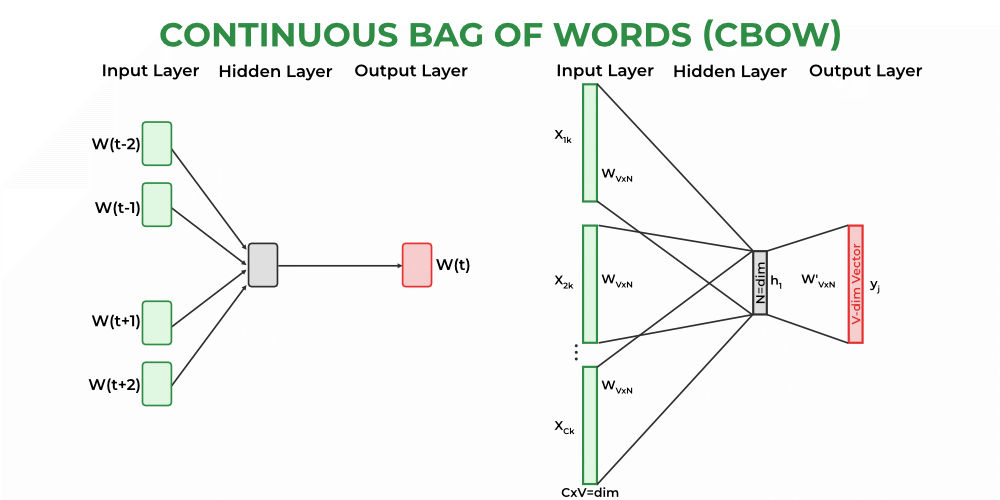

```
"The cat sits on the mat"
```

Training example (window size = 2):

* Context: `["the", "sits"]`
* Target: `"cat"`

So the model learns:

```
Input:  ["the", "sits"]  
Output: "cat"
```

➡️ Over time, the model learns that *“cat” often appears near “the” and “sits.”*


#### Skip-gram

👉 **Goal**: Predict the **context words** from the **target word**.
👉 Think of it as: *“Given one word, guess its neighbors.”*



```
"The cat sits on the mat"
```

Training example (window size = 2):

* Target: `"cat"`
* Context: `["the", "sits"]`

So the model learns:

```
Input:  "cat"  
Output: "the", "sits"
```

➡️ Over time, the model learns that *“cat” is often surrounded by words like “the” and “sits.”*

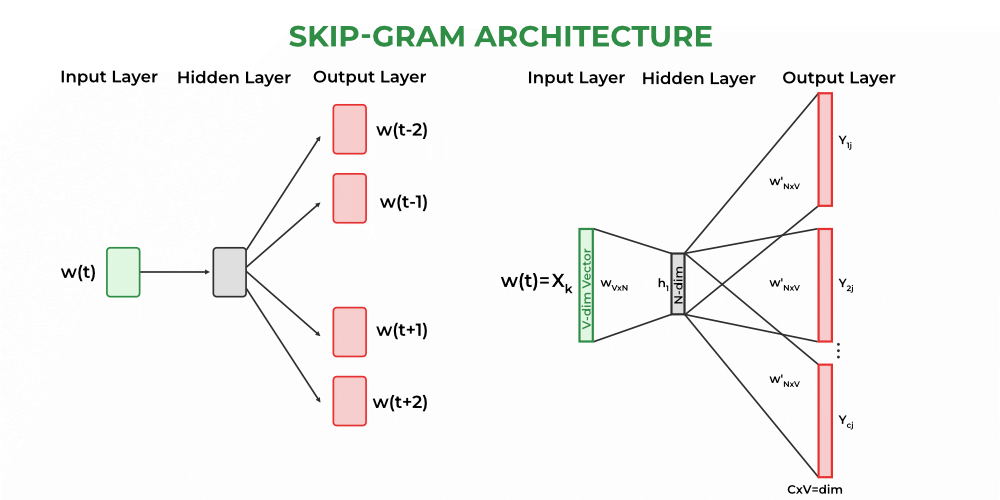

#### Comparison

| Feature      | CBOW (Continuous Bag of Words)  | Skip-gram                          |
| ------------ | ------------------------------- | ---------------------------------- |
| Input        | Context words (neighbors)       | Target word (center word)          |
| Output       | Target word (center)            | Context words (neighbors)          |
| Works better | Small datasets                  | Large datasets                     |
| Fast or Slow | Faster (averages context words) | Slower (predicts multiple outputs) |
| Example      | `["the","sits"] → "cat"`        | `"cat" → ["the","sits"]`           |

**Beginner-Friendly Analogy**

* **CBOW**: Like a **detective** — you look at the surrounding clues (context) and guess the missing word.
* **Skip-gram**: Like a **teacher** — you take a word and explain what kind of neighbors it usually has.

**Why Both Are Useful?**

* **CBOW** is efficient: good when data is small.
* **Skip-gram** gives better embeddings for rare words: good for larger datasets.


## Applied Pytorch Embedding

**What is an embedding layer?**
> An embedding layer in PyTorch (`nn.Embedding`) is a lookup table that maps discrete indices (like words, IDs, tokens) into continuous vectors.
> Example: word `"cat"` → index `3` → embedding vector `[0.25, -0.11, 0.78]`.

**Why do we use it?**
> Instead of representing words as one-hot vectors (huge and sparse), embeddings give a **dense, learnable representation** that captures meaning/relationships.

**How does it train?**

>  * Embedding weights are stored in a matrix.
>  * Each index looks up one row.
>  * During training (via backpropagation), only the embeddings used in that batch are updated.
>  * Optimizers like SGD/Adam adjust these vectors so that they better fit the task (classification, prediction, etc.).



###  Example: Training a Tiny Embedding Layer

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# -----------------------------
# 1. Setup: Vocabulary & Data
# -----------------------------
# Suppose we have 6 "words" (0 to 5)
vocab_size = 6
embedding_dim = 3   # Each word will be represented by a 3D vector

# Toy dataset: word indices and labels (binary classification)
# Words 0,1,2 -> class 0 ; Words 3,4,5 -> class 1
inputs  = torch.tensor([0, 1, 2, 3, 4, 5])
labels  = torch.tensor([0, 0, 0, 1, 1, 1])

# -----------------------------
# 2. Define Model
# -----------------------------
class SimpleEmbeddingModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SimpleEmbeddingModel, self).__init__()
        # Embedding layer: turns word indices into vectors
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        # Linear layer: maps embedding to output class (0 or 1)
        self.fc = nn.Linear(embedding_dim, 2)

    def forward(self, x):
        # Look up embedding vector
        x = self.embedding(x)
        # Pass through linear layer
        x = self.fc(x)
        return x

model = SimpleEmbeddingModel(vocab_size, embedding_dim)

# -----------------------------
# 3. Loss & Optimizer
# -----------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# -----------------------------
# 4. Training Loop
# -----------------------------
for epoch in range(20):
    # Forward pass
    outputs = model(inputs)           # shape: [6,2]
    loss = criterion(outputs, labels)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 5 == 0:
        print(f"Epoch [{epoch+1}/20], Loss: {loss.item():.4f}")

# -----------------------------
# 5. Inspect Learned Embeddings
# -----------------------------
print("\nLearned Embedding Weights:")
print(model.embedding.weight.data)

Epoch [5/20], Loss: 0.6431
Epoch [10/20], Loss: 0.6149
Epoch [15/20], Loss: 0.6001
Epoch [20/20], Loss: 0.5868

Learned Embedding Weights:
tensor([[-1.7881,  1.6190, -0.8313],
        [-0.7699,  2.1302,  0.7981],
        [ 0.5729, -1.0448,  0.7699],
        [ 0.5150,  0.2685, -0.6719],
        [-2.3819,  0.1545,  0.9881],
        [ 1.1943, -0.8256,  0.2709]])


### What happens here?



> * `nn.Embedding(vocab_size, embedding_dim)` creates a **matrix of size `[6 × 3]`** (6 words, each with a 3D vector).
> * Each input index selects a row. Example: index `2` → `[0.12, -0.55, 0.33]`.
> * Training updates these rows so words in the same class (`0,1,2` vs `3,4,5`) get embeddings that help the classifier separate them.



## Implementing a Data Loader

Step 1: Tokenize the entire text
    
Step 2: Use a sliding window to chunk the book into overlapping sequences of max_length

Step 3: Return the total number of rows in the dataset

Step 4: Return a single row from the dataset

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch   # Needed for tensor conversion


class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        """
        Args:
            txt (str): The raw text to train on.
            tokenizer: A tokenizer (e.g., GPT-2 tokenizer from tiktoken).
            max_length (int): The sequence length (number of tokens) each sample should contain.
            stride (int): Step size for the sliding window.
                          (Controls overlap between consecutive samples.)
        """
        self.input_ids = []   # Stores input token sequences
        self.target_ids = []  # Stores shifted target token sequences

        # -------------------------------
        # 1. Tokenize the entire text
        # -------------------------------
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # -------------------------------
        # 2. Sliding Window
        # -------------------------------
        # Break text into chunks of length `max_length`
        # Move the window forward by `stride` each time
        for i in range(0, len(token_ids) - max_length, stride):
            # Input sequence
            input_chunk = token_ids[i:i + max_length]

            # Target sequence = same as input, but shifted by one position
            target_chunk = token_ids[i + 1: i + max_length + 1]

            # Convert to PyTorch tensors
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        # Total number of samples in dataset
        return len(self.input_ids)

    def __getitem__(self, idx):
        # Fetch one sample (input sequence, target sequence)
        return self.input_ids[idx], self.target_ids[idx]


The GPTDatasetV1 class is based on the PyTorch Dataset class.

It defines how individual rows are fetched from the dataset.

Each row consists of a number of
token IDs (based on a max_length) assigned to an input_chunk tensor.

The target_chunk
tensor contains the corresponding targets.

I recommend reading on to see how the data
returned from this dataset looks like when we combine the dataset with a PyTorch
DataLoader -- this will bring additional intuition and clarity.

In [ ]:
def create_dataloader_v1(
    txt,
    batch_size=4,
    max_length=256,
    stride=128,
    shuffle=True,
    drop_last=True,
    num_workers=0
):
    """
    Create a PyTorch DataLoader for training a GPT-like model.

    Args:
        txt (str): Raw training text.
        batch_size (int): Number of sequences per batch (default=4).
        max_length (int): Length of each input sequence in tokens (default=256).
        stride (int): Step size for the sliding window (default=128).
                      - Smaller stride → more overlap, more training samples.
                      - Larger stride → less overlap, fewer samples.
        shuffle (bool): Whether to shuffle samples each epoch (default=True).
        drop_last (bool): Drop the last incomplete batch if dataset size
                          is not divisible by batch_size (default=True).
        num_workers (int): Number of subprocesses for data loading
                           (0 = load in main process, good for small datasets).

    Returns:
        dataloader (torch.utils.data.DataLoader): A DataLoader that yields
        (input_ids, target_ids) batches.
    """

    # --------------------------------
    # 1. Initialize the tokenizer
    # --------------------------------
    # GPT-2 tokenizer with Byte Pair Encoding (BPE)
    tokenizer = tiktoken.get_encoding("gpt2")

    # --------------------------------
    # 2. Create custom dataset
    # --------------------------------
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # --------------------------------
    # 3. Wrap dataset in DataLoader
    # --------------------------------
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,  # how many (input, target) pairs per batch
        shuffle=shuffle,        # randomize order each epoch (helps training)
        drop_last=drop_last,    # ensures all batches are full
        num_workers=num_workers # parallel loading (keep 0 on Windows for safety)
    )

    return dataloader


---

| Parameter                                    | Meaning                                                                                                                                                                    | Effect/Impact                                                                                                                                                           <br>                                                                                                                                  |
| -------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **batch\_size=4**                            | Number of samples processed<br> together in one forward/backward pass.                                                                                                         | Smaller batch → noisier gradients (may generalize better), <br> faster iteration, less GPU memory. <br><br>Larger batch → smoother gradients, <br>stable convergence, but more memory/computation.                                                                                                                         |
| **max\_length=256**                          | Maximum sequence length (tokens)<br> allowed per sample. Shorter padded, <br>longer truncated.                                                                                     | Higher → model captures more context but slower <br>& memory-heavy.<br><br> Lower → faster, but context may be lost.                                                                                                                                                                                                  |
| **stride=128**                               | Tokens to shift when splitting <br>overlapping text windows.                                                                                                                   | Small stride → more overlap, better context coverage,<br> but redundancy and more training data.<br><br> Large stride → less overlap, fewer samples, but may lose <br> continuity.                                                                                                                                         |
| **shuffle=True**                             | Randomizes dataset order each<br> epoch.                                                                                                                                       | Breaks sequential bias, improves generalization.<br> Without shuffle, the model may overfit to order patterns.                                                                                                                                                                                                |
| **drop\_last=True**                          | Drops the last incomplete batch if<br> dataset size isn’t divisible by batch\_size.                                                                                            | Ensures **all batches equal size** <br> (important in distributed training). <br><br> If True, dataset size reduces slightly each epoch<br> → can cause **small fluctuations (training spikes)** <br>in loss/metrics at epoch boundaries. <br><br>If False, last batch is smaller, which may cause **instability**<br> in gradient updates. |
| **num\_workers=0**                           | Number of parallel subprocesses for <br> data loading.                                                                                                                          | `0` → loads data in main process (stable but slower).<br><br> Higher values → faster data fetching, better GPU utilization,<br> but risk of CPU overhead, memory spikes, or deadlocks if <br> too high.                                                                                                                    |
| **Difference: batch\_size vs. num\_workers** | **batch\_size** = how many samples are <br>processed **per training step**. <br> **num\_workers** = how many CPU <br>subprocesses fetch data **in parallel** to <br>keep the GPU busy. | Increasing **batch\_size** affects **model training dynamics** <br>(gradient quality, memory).<br><br> Increasing **num\_workers** affects only **data loading speed**, <br> not training convergence.                                                                                                                     |

<br>


* `drop_last=True` can cause **training spikes** because each epoch may discard a few samples. That slightly changes data distribution across epochs, causing small but noticeable jumps in loss curves.
* `batch_size` is tied to **GPU usage and gradient updates**.
* `num_workers` is tied to **CPU usage and data pipeline throughput**.

---




In [ ]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

In [ ]:
import torch
print("PyTorch version:", torch.__version__)
dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=4, stride=1, shuffle=False
)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

PyTorch version: 2.8.0+cu126
[tensor([[  40,  550, 1464, 1807]]), tensor([[ 550, 1464, 1807, 3619]])]


The first_batch variable contains two tensors: the first tensor stores the input token IDs,
and the second tensor stores the target token IDs.

Since the max_length is set to 4, each of the two tensors contains 4 token IDs.

Note that an input size of 4 is relatively small and only chosen for illustration purposes. It is common to train LLMs with input sizes of at least
256.

To illustrate the meaning of stride=1, let's fetch another batch from this dataset

In [ ]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 550, 1464, 1807, 3619]]), tensor([[1464, 1807, 3619,  402]])]


If we compare the first with the second batch, we can see that the second batch's token
IDs are shifted by one position compared to the first batch.

For example, the second ID in
the first batch's input is 367, which is the first ID of the second batch's input.

The stride
setting dictates the number of positions the inputs shift across batches, emulating a sliding
window approach


Just like in regular deep learning, the batch size is a trade-off and hyperparameter
to experiment with when training LLMs.

Small batch sizes require less memory during training but lead to more noisy model updates.

In [ ]:
dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=4, stride=4, shuffle=False)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[   40,   550,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   198],
        [  198, 11274,  5891,  1576],
        [  438,   568,   340,   373],
        [  645,  1049,  5975,   284],
        [  502,   284,  3285,   198]])

Targets:
 tensor([[  550,  1464,  1807,  3619],
        [  402,   271, 10899,  2138],
        [  257,  7026, 15632,   438],
        [ 2016,   257,   198,   198],
        [11274,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   198,   198]])


## Create Token Embeddings

In [ ]:
input_ids = torch.tensor([2, 3, 5, 1])

In [ ]:
# Vocabulary size = number of unique tokens (like words/subwords in your vocab)
vocab_size = 6

# Embedding dimension = size of each token’s vector representation
output_dim = 3

# Set random seed for reproducibility (so weights are the same each run)
torch.manual_seed(123)

# Create embedding layer
# - Input: token IDs (0 to vocab_size-1)
# - Output: dense vectors of size `output_dim`
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)


In [ ]:
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [ ]:
print(embedding_layer(torch.tensor([3])))

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


In [ ]:
print(embedding_layer(input_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


## Positional Embeddings

In [ ]:
vocab_size = 50257
output_dim = 256

token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [ ]:
max_length = 4
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=max_length,
    stride=max_length, shuffle=False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)

In [ ]:
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)

Token IDs:
 tensor([[   40,   550,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   198],
        [  198, 11274,  5891,  1576],
        [  438,   568,   340,   373],
        [  645,  1049,  5975,   284],
        [  502,   284,  3285,   198]])

Inputs shape:
 torch.Size([8, 4])


In [ ]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [ ]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)

In [ ]:
pos_embeddings = pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


In [ ]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])
